In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import pandas lib as pd
import pandas as pd
 
# read by default 1st sheet of an excel file
df = pd.read_excel('preprocessed_data.xlsx')
 
df.head()

,Unnamed: 0,id,status,date_submitted,gender,age,region,watch_options,preferred_cinema,language_options,watch_duration,weekly_duration,top_genres,preferred_screen_size,romantic_preference,horror_preference,monthly_expense,ott_subscription,preferred_time
0,0,330,Submitted,2023-04-21 13:48:00,0,18,1,['Movies'],3,['Dubbed'],1.5,2,"['Comedy', ' Thriller', ' Action/Adventure']",0,0,1,200.0,0,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)']"
1,1,329,Submitted,2023-04-21 06:46:00,1,15,1,"['Anime', ' Web series']",3,"['Dubbed', ' Subtitle']",1.0,8,"['Romance', ' Comedy', ' Action/Adventure']",2,1,0,0.0,1,"['Morning (5am-12pm)', ' Afternoon (12pm-4pm)']"
2,2,328,Submitted,2023-04-20 18:56:00,1,19,0,"['Movies', ' Web series']",3,['Dubbed'],3.5,10,"['Romance', ' Comedy', ' Action/Adventure']",1,0,1,30.0,0,['Night (8pm-5am)']
3,3,327,Submitted,2023-04-20 18:47:00,1,20,0,['Anime'],2,['Subtitle'],5.0,0,"['Romance', ' Thriller', ' Action/Adventure']",0,0,0,0.0,0,['Night (8pm-5am)']
4,4,326,Submitted,2023-04-20 18:27:00,0,15,1,['Web series'],2,['Subtitle'],13.0,5,"['Romance', ' Thriller', ' Action/Adventure']",0,0,1,0.0,0,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)',..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             320 non-null    int64         
 1   id                     320 non-null    int64         
 2   status                 320 non-null    object        
 3   date_submitted         320 non-null    datetime64[ns]
 4   gender                 320 non-null    int64         
 5   age                    320 non-null    int64         
 6   region                 320 non-null    int64         
 7   watch_options          320 non-null    object        
 8   preferred_cinema       320 non-null    int64         
 9   language_options       320 non-null    object        
 10  watch_duration         320 non-null    float64       
 11  weekly_duration        320 non-null    int64         
 12  top_genres             320 non-null    object        
 13  prefe

In [4]:
df.describe()

,Unnamed: 0,id,gender,age,region,preferred_cinema,watch_duration,weekly_duration,preferred_screen_size,romantic_preference,horror_preference,monthly_expense,ott_subscription
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,159.500000,170.500000,0.787500,20.021875,0.465625,1.553125,3.484687,13.518750,0.665625,0.584375,0.606250,332.967781,0.521875
std,92.520268,92.520268,0.424744,3.688858,0.499598,1.143466,3.979467,19.738565,0.825195,0.884775,0.489346,701.278173,0.500304
min,0.000000,11.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.750000,90.750000,1.000000,19.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159.500000,170.500000,1.000000,19.000000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,1.000000,100.000000,1.000000
75%,239.250000,250.250000,1.000000,20.000000,1.000000,3.000000,4.000000,15.000000,1.000000,2.000000,1.000000,500.000000,1.000000
max,319.000000,330.000000,2.000000,50.000000,1.000000,3.000000,50.000000,140.000000,2.000000,2.000000,1.000000,5000.000000,1.000000


In [5]:
# Count the number of values 2 in gender column
num_of_twos = (df['gender'] == 2).sum()
print("Count of twos in gender column:", num_of_twos)

Count of twos in gender column: 2


#### Remove such rows from dataframe as these are outliers
- Information about population parameters can't be drawn from just 2 samples
- 0 - Female, 1- Male, 2- Others

In [6]:
# Remove rows with value 2 in gender column
df = df.drop(df[df['gender'] == 2].index)

# Confirm the rows have been dropped
print("Count of twos in gender column after removing rows with value 2:", (df['gender'] == 2).sum())

Count of twos in gender column after removing rows with value 2: 0


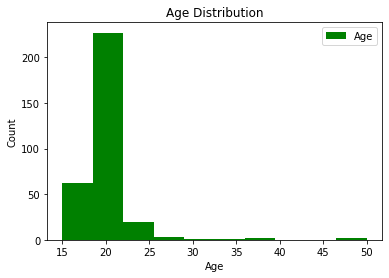

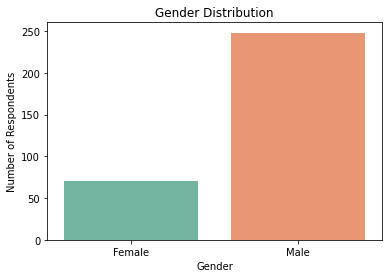

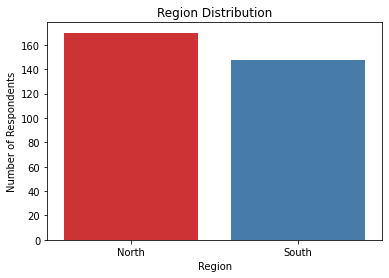

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a histogram of ages using matplotlib
plt.hist(df['age'], bins=10, color='green', label='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Create a bar chart of gender distribution using seaborn
gender_counts = df['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.xticks(ticks=[0,1], labels=["Female", "Male"]) # add relevant labels to the legend
plt.show()

# Create a bar chart of gender distribution using seaborn
region_counts = df['region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set1')
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Number of Respondents")
plt.xticks(ticks=[0,1], labels=["North", "South"]) # add relevant labels to the legend
plt.show()



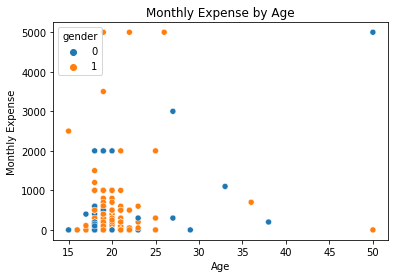

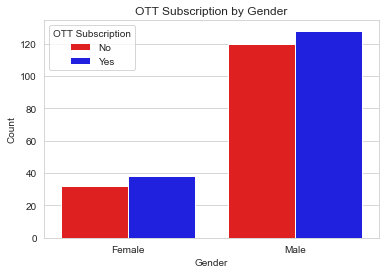

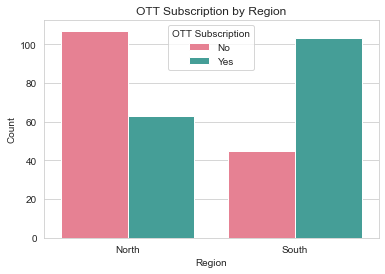

In [8]:

# Create a scatterplot of age vs. monthly expense using seaborn
sns.scatterplot(x='age', y='monthly_expense', data=df, hue='gender')
plt.title('Monthly Expense by Age')
plt.xlabel('Age')
plt.ylabel('Monthly Expense')
# plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


# Create a bar chart of OTT subscription by gender using seaborn
sns.set_style("whitegrid")
sns.countplot(x='gender', hue='ott_subscription', data=df, palette=["red", "blue"])
plt.title('OTT Subscription by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=["Female", "Male"]) # add relevant labels to the legend
plt.legend(title='OTT Subscription', labels=['No', 'Yes'])
plt.show()


# Create a bar chart of OTT subscription by region using seaborn
sns.countplot(x='region', hue='ott_subscription', data=df, palette='husl')
plt.title('OTT Subscription by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=["North", "South"]) # add relevant labels to the legend
plt.legend(title='OTT Subscription', labels=['No', 'Yes'])
plt.show()


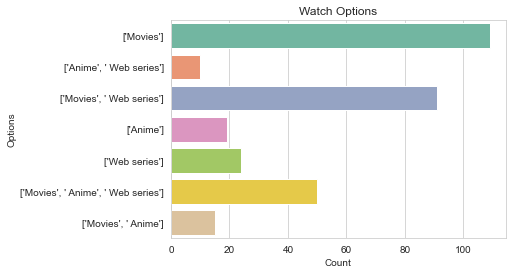

In [9]:
# Explode the watch_options column into individual rows
watch_options = df['watch_options'].explode()

# Create a countplot of the watch_options values using seaborn
sns.countplot(y=watch_options, palette='Set2')
plt.title('Watch Options')
plt.xlabel('Count')
plt.ylabel('Options')
plt.show()


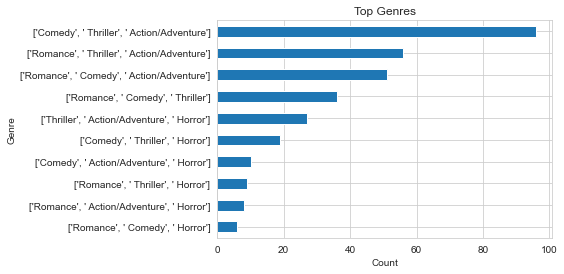

In [10]:
# Count the occurrences of each genre in top_genres
genres_counts = pd.Series(df['top_genres'].explode().value_counts())

# Create a horizontal bar chart of the top 10 genres
genres_counts.nlargest(10).sort_values().plot(kind='barh')
plt.title('Top Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [11]:
# # Define the list of genres to extract
# genres_to_extract = ['Comedy', 'Thriller', 'Action/Adventure', 'Romance', 'Horror']

# # Create an empty dataframe with the desired columns
# extracted_genres = pd.DataFrame(columns=['gender', 'region'] + genres_to_extract)

# # Extract the top genres, gender, and region from the original dataframe and append to extracted_genres
# for i, row in df.iterrows():
#     genres = row['top_genres']
#     gender = row['gender']
#     region = row['region']
#     row = {'gender': gender, 'region': region}
#     row.update({genre: 1 if genre in genres else 0 for genre in genres_to_extract})
#     extracted_genres = extracted_genres.append(row, ignore_index=True)

# # Display the extracted genres dataframe
# print(extracted_genres)

In [12]:
# Define the list of genres to extract
genres_to_extract = ['Comedy', 'Thriller', 'Action/Adventure', 'Romance', 'Horror']

# Create an empty dataframe with the desired columns
extracted_genres = pd.DataFrame(columns=['gender', 'region'] + genres_to_extract)

# Extract the top genres from the original dataframe and append to extracted_genres
for i, row in df.iterrows():
    genres = row['top_genres']
    extracted_row = {'gender': 'Female' if row['gender'] == 0 else 'Male', 'region': 'North' if row['region'] == 0 else 'South'}
    extracted_row.update({genre: 1 if genre in genres else 0 for genre in genres_to_extract})
    extracted_genres = extracted_genres.append(extracted_row, ignore_index=True)

# Display the extracted genres dataframe
extracted_genres.head()


,gender,region,Comedy,Thriller,Action/Adventure,Romance,Horror
0,Female,South,1,1,1,0,0
1,Male,South,1,0,1,1,0
2,Male,North,1,0,1,1,0
3,Male,North,0,1,1,1,0
4,Female,South,0,1,1,1,0


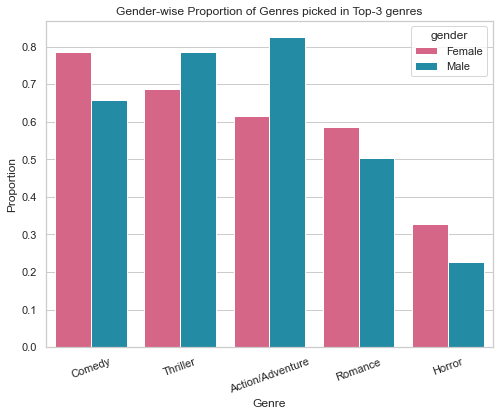

In [13]:
# Define the list of genres
genres = ['Comedy', 'Thriller', 'Action/Adventure', 'Romance', 'Horror']

# Create a melted version of the dataframe for easier plotting
melted_df = pd.melt(extracted_genres, id_vars=['gender', 'region'], value_vars=genres, var_name='genre', value_name='count')

plt.figure(figsize=(8, 6))
# Create the bar chart using seaborn
sns.set(style='whitegrid')
sns.barplot(x='genre', y='count', hue='gender', data=melted_df, ci=None, 
            palette=sns.color_palette(['#E75480', '#0D98BA']))


# Add labels and title
plt.title('Gender-wise Proportion of Genres picked in Top-3 genres')
plt.xlabel('Genre')
plt.xticks(rotation=20)
plt.ylabel('Proportion')

# Show the plot
plt.show()

#### Proportion=0.8 in Thriller by gender = 'Male' 
- implies that around ~80 % of males picked Thriller in their TOP-3 genres

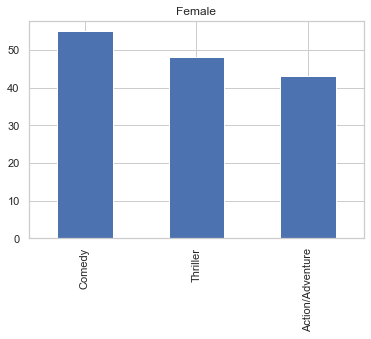

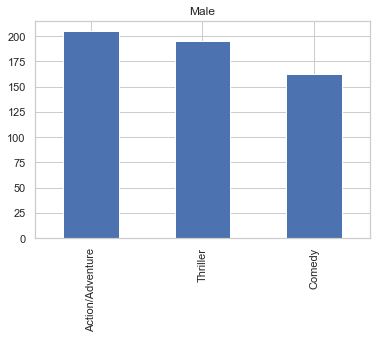

In [14]:
# Group by gender and calculate the sum of each genre for each group
genre_by_gender = extracted_genres.groupby('gender')[genres].sum()

# Get the top 3 genres for each gender separately
top3_by_gender = {}
for gender in genre_by_gender.index:
    top3_by_gender[gender] = genre_by_gender.loc[gender].sort_values(ascending=False).head(3).index

# Get the top 3 genres overall
top3_genres = genre_by_gender.sum().sort_values(ascending=False).head(3).index

# Create a new dataframe with only the top 3 genres for each gender
genre_by_gender_top3 = genre_by_gender[top3_genres]


# Plot segmented bar chart for each gender separately
for gender in genre_by_gender.index:
    top3_genres = genre_by_gender.loc[gender, top3_by_gender[gender]]
    top3_genres.plot(kind='bar', stacked=True, title=gender)
    plt.show()

In [15]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['weekly_duration'], df['monthly_expense'])

# Print correlation coefficient
print('Correlation coefficient:', corr_coef)

Correlation coefficient: 0.35057704472230233


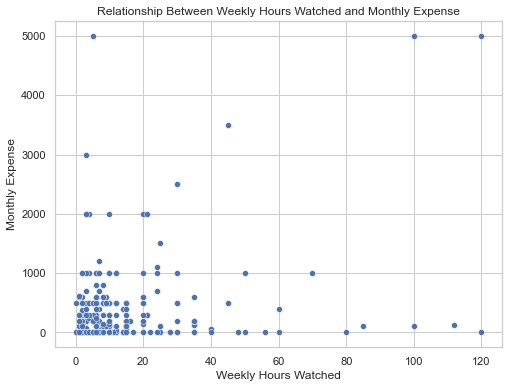

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8,6))
# Create the scatter plot with regression line
sns.scatterplot(x='weekly_duration', y='monthly_expense', data=df)

# Add labels and title
plt.xlabel('Weekly Hours Watched')
plt.ylabel('Monthly Expense')
plt.title('Relationship Between Weekly Hours Watched and Monthly Expense')

# Show the plot
plt.show()


## Removing fake datas

In [17]:
filtered_df = df[(df['watch_duration'] < 24)]
filtered_df

,Unnamed: 0,id,status,date_submitted,gender,age,region,watch_options,preferred_cinema,language_options,watch_duration,weekly_duration,top_genres,preferred_screen_size,romantic_preference,horror_preference,monthly_expense,ott_subscription,preferred_time
0,0,330,Submitted,2023-04-21 13:48:00,0,18,1,['Movies'],3,['Dubbed'],1.5,2,"['Comedy', ' Thriller', ' Action/Adventure']",0,0,1,200.0,0,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)']"
1,1,329,Submitted,2023-04-21 06:46:00,1,15,1,"['Anime', ' Web series']",3,"['Dubbed', ' Subtitle']",1.0,8,"['Romance', ' Comedy', ' Action/Adventure']",2,1,0,0.0,1,"['Morning (5am-12pm)', ' Afternoon (12pm-4pm)']"
2,2,328,Submitted,2023-04-20 18:56:00,1,19,0,"['Movies', ' Web series']",3,['Dubbed'],3.5,10,"['Romance', ' Comedy', ' Action/Adventure']",1,0,1,30.0,0,['Night (8pm-5am)']
3,3,327,Submitted,2023-04-20 18:47:00,1,20,0,['Anime'],2,['Subtitle'],5.0,0,"['Romance', ' Thriller', ' Action/Adventure']",0,0,0,0.0,0,['Night (8pm-5am)']
4,4,326,Submitted,2023-04-20 18:27:00,0,15,1,['Web series'],2,['Subtitle'],13.0,5,"['Romance', ' Thriller', ' Action/Adventure']",0,0,1,0.0,0,"['Afternoon (12pm-4pm)', ' Evening (4pm-8pm)',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,15,Submitted,2023-04-19 14:50:00,1,20,1,"['Movies', ' Web series']",1,['Subtitle'],4.0,6,"['Comedy', ' Thriller', ' Action/Adventure']",0,0,1,500.0,1,['Night (8pm-5am)']
316,316,14,Submitted,2023-04-19 14:46:00,1,20,1,"['Movies', ' Anime', ' Web series']",1,['Subtitle'],2.0,15,"['Romance', ' Thriller', ' Action/Adventure']",0,0,1,500.0,1,"['Evening (4pm-8pm)', ' Night (8pm-5am)']"
317,317,13,Submitted,2023-04-19 14:41:00,1,19,1,['Movies'],3,['Dubbed'],2.5,15,"['Romance', ' Comedy', ' Thriller']",1,0,1,400.0,1,['Night (8pm-5am)']
318,318,12,Submitted,2023-04-19 14:37:00,1,21,0,"['Movies', ' Web series']",1,['Subtitle'],3.0,10,"['Romance', ' Comedy', ' Action/Adventure']",0,0,1,200.0,1,['Night (8pm-5am)']


In [18]:

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(filtered_df['weekly_duration'], filtered_df['watch_duration'])

# Print correlation coefficient
print('Correlation coefficient:', corr_coef)

Correlation coefficient: 0.5045762956701388


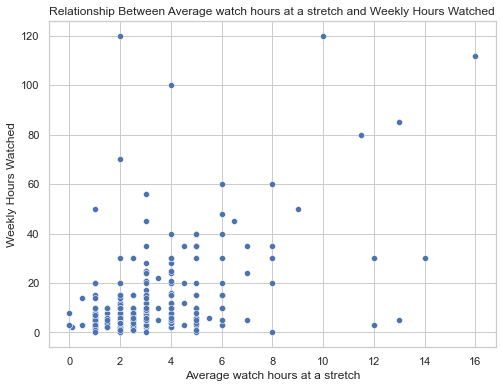

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
# Create the scatter plot with regression line
sns.scatterplot(x='watch_duration', y='weekly_duration', data=filtered_df)

# Add labels and title
plt.xlabel('Average watch hours at a stretch')
plt.ylabel('Weekly Hours Watched')
plt.title('Relationship Between Average watch hours at a stretch and Weekly Hours Watched')

# Show the plot
plt.show()

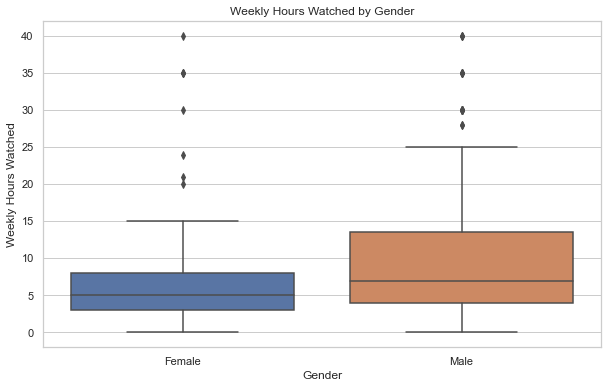

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df[(df['weekly_duration'] <= 40)]


# create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 6))

# create a side-by-side box plot using seaborn
sns.boxplot(x='gender', y='weekly_duration', data=df2, ax=ax)

# add labels and title
ax.set_xlabel('Gender')
plt.xticks(ticks=[0,1], labels=["Female", "Male"]) # add relevant labels to the legend
ax.set_ylabel('Weekly Hours Watched')
ax.set_title('Weekly Hours Watched by Gender')

# show the plot
plt.show()


In [21]:
df['gender'] = df['gender'].replace({0: 'Female', 1: 'Male'})

# Create a contingency table for subscription vs gender
contingency_table = pd.crosstab(df['ott_subscription'], df['gender'])
contingency_table

gender,Female,Male
ott_subscription,,
0,32,120
1,38,128


In [31]:
# Create the contingency table
contingency_table = pd.crosstab(df['gender'], df['ott_subscription'])

# Add row and column totals
contingency_table.loc['Total'] = contingency_table.sum()
contingency_table['Total'] = contingency_table.sum(axis=1)

# Calculate marginal proportions
total_subscribers = contingency_table.loc['Total', 1]
total_non_subscribers = contingency_table.loc['Total', 0]
total_female = contingency_table.loc['Female', 'Total']
total_male = contingency_table.loc['Male', 'Total']

# contingency_table['% of Subscribers'] = contingency_table[1].apply(lambda x: f"{x / total_subscribers:.2%}")
# contingency_table['% of Non-Subscribers'] = contingency_table[0].apply(lambda x: f"{x / total_non_subscribers:.2%}")
# contingency_table.loc['Female', '% of Total'] = f"{total_female / (total_female + total_male):.2%}"
# contingency_table.loc['Male', '% of Total'] = f"{total_male / (total_female + total_male):.2%}"


# Rename the columns
contingency_table = contingency_table.rename(columns={0: 'Not Subscribed', 1: 'Subscribed'})

contingency_table


ott_subscription,Not Subscribed,Subscribed,Total
gender,,,
Female,32,38,70
Male,120,128,248
Total,152,166,318


In [41]:
import numpy as np
# create the contingency table
cont_table = pd.crosstab(df['gender'], df['ott_subscription'])

cont_table.loc['Total'] = cont_table.sum()
cont_table['Total'] = cont_table.sum(axis=1)

# calculate the percentages
total_women = cont_table.loc['Female', 'Total']
total_men = cont_table.loc['Male', 'Total']
cont_table.loc['Female', :] = np.round((cont_table.loc['Female', :] / total_women) * 100, 2)
cont_table.loc['Male', :] = np.round((cont_table.loc['Male', :] / total_men) * 100, 2)

cont_table = cont_table.rename(columns={0: '% Not Subscribed', 1: '% Subscribed'})
# display the contingency table with percentages
cont_table

ott_subscription,% Not Subscribed,% Subscribed,Total
gender,,,
Female,45.71,54.29,100
Male,48.39,51.61,100
Total,152.00,166.00,318


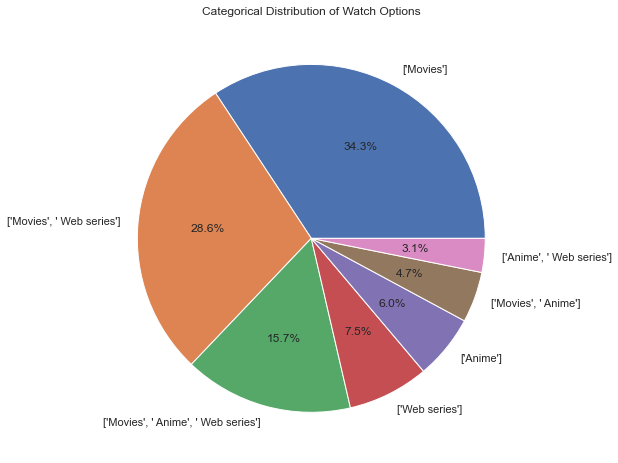

In [43]:
# Count the frequency of each category in the watch_options column
watch_options_counts = df['watch_options'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8)) # set figure size
plt.pie(watch_options_counts.values, labels=watch_options_counts.index, autopct='%1.1f%%')
plt.title('Categorical Distribution of Watch Options')
plt.show()

In [49]:
# Define the list of genres to extract
to_extract = ['Movies', 'Anime', 'Web series']

# Create an empty dataframe with the desired columns
extracted_df = pd.DataFrame(columns=['gender', 'region'] + to_extract)

# Extract the top genres from the original dataframe and append to extracted_genres
for i, row in df.iterrows():
    genres = row['watch_options']
    extracted_row = {'gender': 'Female' if row['gender'] == 0 else 'Male', 'region': 'North' if row['region'] == 0 else 'South'}
    extracted_row.update({genre: 1 if genre in genres else 0 for genre in to_extract})
    extracted_df = extracted_df.append(extracted_row, ignore_index=True)

# Display the extracted genres dataframe
extracted_df.head()

,gender,region,Movies,Anime,Web series
0,Male,South,1,0,0
1,Male,South,0,1,1
2,Male,North,1,0,1
3,Male,North,0,1,0
4,Male,South,0,0,1


In [51]:
sums = extracted_df[['Movies', 'Anime', 'Web series']].sum()
sums

Movies        265
Anime          94
Web series    175
dtype: object

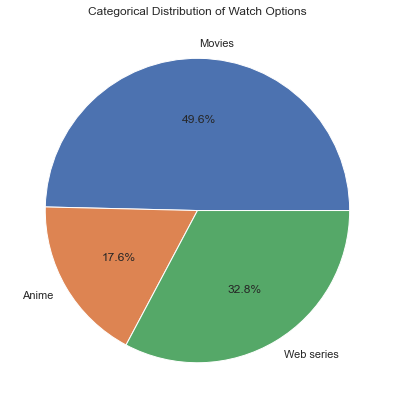

In [54]:
# Plot a pie chart showing their distribution
plt.figure(figsize=(7,7)) # set figure size
plt.pie(sums, labels=sums.index, autopct='%1.1f%%')
plt.title('Categorical Distribution of Watch Options')
plt.show()